In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('../input/datasetn/iphone_purchase_records.csv')

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [3]:
dataset.drop('Gender', axis=1, inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   Salary           400 non-null    int64
 2   Purchase Iphone  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
X = dataset.drop('Purchase Iphone', axis=1).values
Y = dataset['Purchase Iphone'].values

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Salary', ylabel='Age'>,
        <AxesSubplot:xlabel='Purchase Iphone', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>,
        <AxesSubplot:xlabel='Purchase Iphone', ylabel='Salary'>],
       [<AxesSubplot:xlabel='Age', ylabel='Purchase Iphone'>,
        <AxesSubplot:xlabel='Salary', ylabel='Purchase Iphone'>,
        <AxesSubplot:xlabel='Purchase Iphone', ylabel='Purchase Iphone'>]],
      dtype=object)

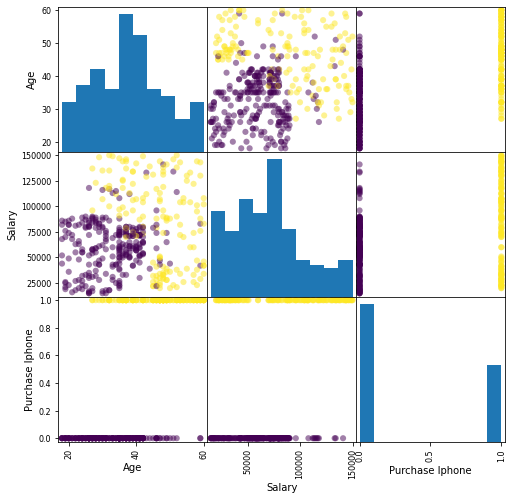

In [6]:
pd.plotting.scatter_matrix(dataset, c = Y, figsize=[8,8], s = 150)

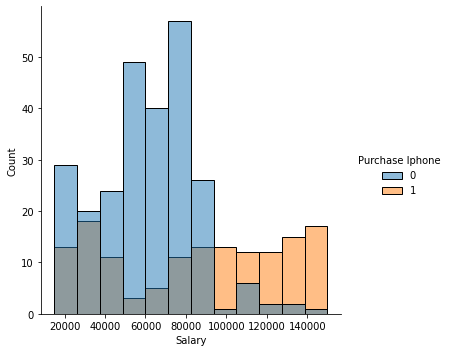

In [7]:
sns.displot(dataset, x='Salary', hue = 'Purchase Iphone')

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=18, stratify= Y)

Text(0, 0.5, 'accuracy')

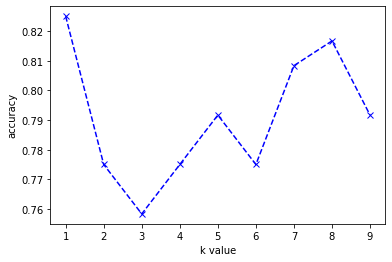

In [10]:
accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.plot(range(1,10), accuracy, color='blue', linestyle= 'dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [11]:
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.8166666666666667

In [12]:
from mlxtend.plotting import plot_decision_regions
X = dataset.drop('Purchase Iphone', axis = 1).to_numpy()
Y = dataset['Purchase Iphone'].to_numpy()

<AxesSubplot:>

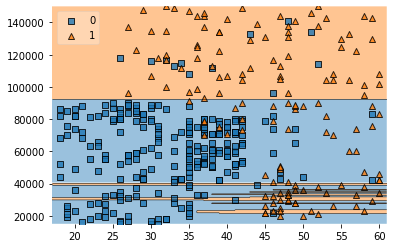

In [13]:
plot_decision_regions(X, Y, clf = knn, legend = 2)